<a href="https://colab.research.google.com/github/Saurabh77-99/MachineLearning/blob/main/AreaAndPopulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import cv2
import plotly.express as px

%matplotlib inline

In [22]:
data = pd.read_csv('/content/california_cities.csv')

In [23]:
data.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


**Data Preprocessing**

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [25]:
data.describe()

,Unnamed: 0,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
count,482.000000,482.000000,482.000000,434.000000,470.000000,4.820000e+02,480.000000,482.000000,481.000000,477.000000,478.000000,478.000000,477.000000
mean,240.500000,36.095088,-119.837714,180.416705,567.168723,6.489493e+04,18.442183,16.840981,1.589630,46.753283,43.547021,3.125178,5.301801
std,139.285678,2.298006,2.147676,309.531825,1001.265722,2.032041e+05,36.363230,32.694647,9.490386,90.972269,84.933022,11.562269,14.656428
min,0.000000,32.578333,-124.263333,-34.000000,-180.000000,1.000000e+00,0.314000,0.314000,0.000000,0.813000,0.813000,0.000000,0.000000
25%,120.250000,33.977292,-121.954931,22.000000,69.000000,1.090200e+04,3.708250,3.506500,0.000000,9.551000,9.025000,0.000250,0.000000
50%,240.500000,36.204722,-119.708611,67.000000,200.000000,2.905750e+04,9.093000,8.362000,0.029000,23.551000,21.533000,0.078500,0.340000
75%,360.750000,37.886667,-117.977292,173.500000,515.000000,6.646650e+04,19.878250,19.090000,0.244000,51.772000,49.322000,0.623250,1.870000
max,481.000000,41.965000,-114.596389,2402.000000,7880.000000,3.884307e+06,503.000000,469.000000,185.020000,1302.000000,1214.000000,122.270000,84.580000


In [26]:
data.columns

Index(['Unnamed: 0', 'city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')

In [27]:
print(data.head())

   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  area_water_km2  area_water_p

In [28]:
latitude , longitude = data["latd"], data["longd"]
population , area = data["population_total"], data["area_total_km2"]

In [29]:
sns.set()

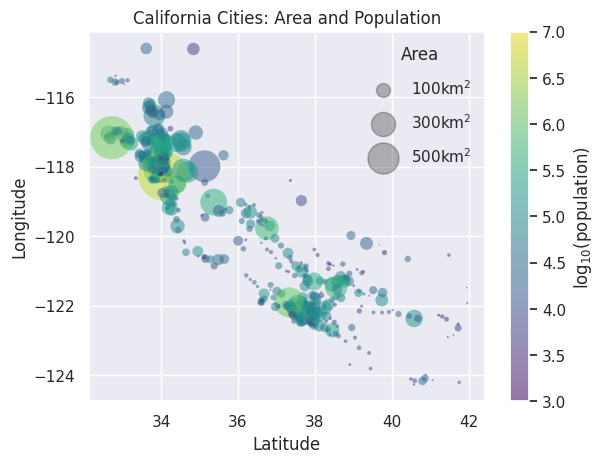

In [30]:
plt.scatter(latitude, longitude,label=None,c=np.log10(population), cmap="viridis",s=area,linewidth=0,alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.colorbar(label="log$_{10}$(population)")
plt.clim(3,7)

for area in [100,300,500]:
    plt.scatter([],[], c = 'k',alpha = 0.3,s = area,label = str(area) + "km$^2$")
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title="Area")
plt.title("California Cities: Area and Population");
plt.show()